In [1]:
import pandas as pd

In [2]:
meas=pd.read_csv('meas2.csv',header=0)

In [3]:
meas.shape

(27378712, 5)

In [ ]:
meas.head()

In [5]:
meas.person_id.nunique()

68013

In [6]:
meas.fact_id.nunique()

428

In [ ]:
meas['val'] = pd.to_numeric(meas['val'], errors='coerce')
#meas=meas.dropna()
meas.head()

In [8]:
pt=pd.read_csv('patientVisitAge.csv',header=0)

In [9]:
meas=pd.merge(meas,pt[['person_id','visit_occurrence_id','Age']],on=['person_id','visit_occurrence_id'],how='left')

In [10]:
bmip=meas[meas['fact_id'].isin([3013762,3023540])]
bmip=bmip.dropna()
bmip=bmip[bmip['val']>0]
bmip['Age']=bmip['Age']*12
bmip['Age']=bmip['Age'].astype(int)

In [11]:
bmip=bmip.pivot_table(index=['person_id','Age'],columns='fact',values='val')
bmip=bmip.reset_index()
bmip=bmip.dropna()


In [ ]:
bmip.head()

In [13]:
demo=pd.read_csv('demo2.csv',header=0)

In [14]:
bmip=pd.merge(bmip,demo[['person_id','Sex']],on='person_id',how='left')

In [ ]:
bmip.head()

In [16]:
bmip['BMI']=bmip['Body weight Measured']/(bmip['Body height Measured']/100*bmip['Body height Measured']/100)

In [17]:
labs=bmip

In [18]:
fbmi=pd.read_csv('Female_BMI2.csv',header=0)
mbmi=pd.read_csv('Male_BMI2.csv',header=0)

In [80]:
for row in range(fbmi.shape[0]):
    labs.loc[(labs.Sex=='Female') & (labs.Age>=fbmi.iloc[row,0]) & (labs.Age<fbmi.iloc[row,0] + 1) & (labs.BMI<=fbmi.iloc[row,1]),'label']=3
    labs.loc[(labs.Sex=='Female') &(labs.Age>=fbmi.iloc[row,0]) & (labs.Age<fbmi.iloc[row,0] + 1) & (labs.BMI>fbmi.iloc[row,1]) & (labs.BMI<=fbmi.iloc[row,2]),'label']=5
    labs.loc[(labs.Sex=='Female') & (labs.Age>=fbmi.iloc[row,0]) & (labs.Age<fbmi.iloc[row,0] + 1) & (labs.BMI>fbmi.iloc[row,2]) & (labs.BMI<=fbmi.iloc[row,3]),'label']=10
    labs.loc[(labs.Sex=='Female') &(labs.Age>=fbmi.iloc[row,0]) & (labs.Age<fbmi.iloc[row,0] + 1) & (labs.BMI>fbmi.iloc[row,3]) & (labs.BMI<=fbmi.iloc[row,4]),'label']=25
    labs.loc[(labs.Sex=='Female') & (labs.Age>=fbmi.iloc[row,0]) & (labs.Age<fbmi.iloc[row,0] + 1) & (labs.BMI>fbmi.iloc[row,4]) & (labs.BMI<=fbmi.iloc[row,5]),'label']=50
    labs.loc[(labs.Sex=='Female') &(labs.Age>=fbmi.iloc[row,0]) & (labs.Age<fbmi.iloc[row,0] + 1) & (labs.BMI>fbmi.iloc[row,5]) & (labs.BMI<=fbmi.iloc[row,6]),'label']=75
    labs.loc[(labs.Sex=='Female') & (labs.Age>=fbmi.iloc[row,0]) & (labs.Age<fbmi.iloc[row,0] + 1) & (labs.BMI>fbmi.iloc[row,6]) & (labs.BMI<=fbmi.iloc[row,7]),'label']=85
    labs.loc[(labs.Sex=='Female') &(labs.Age>=fbmi.iloc[row,0]) & (labs.Age<fbmi.iloc[row,0] + 1) & (labs.BMI>fbmi.iloc[row,7]) & (labs.BMI<=fbmi.iloc[row,8]),'label']=90
    labs.loc[(labs.Sex=='Female') & (labs.Age>=fbmi.iloc[row,0]) & (labs.Age<fbmi.iloc[row,0] + 1) & (labs.BMI>fbmi.iloc[row,8]) & (labs.BMI<=fbmi.iloc[row,9]),'label']=95
    labs.loc[(labs.Sex=='Female') & (labs.Age>=fbmi.iloc[row,0]) & (labs.Age<fbmi.iloc[row,0] + 1) & (labs.BMI>fbmi.iloc[row,9]) & (labs.BMI<=fbmi.iloc[row,10]),'label']=97
    labs.loc[(labs.Sex=='Female') & (labs.Age>=fbmi.iloc[row,0]) & (labs.Age<fbmi.iloc[row,0] + 1) & (labs.BMI>fbmi.iloc[row,10]),'label']=100
    

In [81]:
for row in range(mbmi.shape[0]):
    labs.loc[(labs.Sex=='Male') & (labs.Age>=mbmi.iloc[row,0]) & (labs.Age<mbmi.iloc[row,0] + 1) & (labs.BMI<=mbmi.iloc[row,1]),'label']=3
    labs.loc[(labs.Sex=='Male') &(labs.Age>=mbmi.iloc[row,0]) & (labs.Age<mbmi.iloc[row,0] + 1) & (labs.BMI>mbmi.iloc[row,1]) & (labs.BMI<=mbmi.iloc[row,2]),'label']=5
    labs.loc[(labs.Sex=='Male') & (labs.Age>=mbmi.iloc[row,0]) & (labs.Age<mbmi.iloc[row,0] + 1) & (labs.BMI>mbmi.iloc[row,2]) & (labs.BMI<=mbmi.iloc[row,3]),'label']=10
    labs.loc[(labs.Sex=='Male') &(labs.Age>=mbmi.iloc[row,0]) & (labs.Age<mbmi.iloc[row,0] + 1) & (labs.BMI>mbmi.iloc[row,3]) & (labs.BMI<=mbmi.iloc[row,4]),'label']=25
    labs.loc[(labs.Sex=='Male') & (labs.Age>=mbmi.iloc[row,0]) & (labs.Age<mbmi.iloc[row,0] + 1) & (labs.BMI>mbmi.iloc[row,4]) & (labs.BMI<=mbmi.iloc[row,5]),'label']=50
    labs.loc[(labs.Sex=='Male') &(labs.Age>=mbmi.iloc[row,0]) & (labs.Age<mbmi.iloc[row,0] + 1) & (labs.BMI>mbmi.iloc[row,5]) & (labs.BMI<=mbmi.iloc[row,6]),'label']=75
    labs.loc[(labs.Sex=='Male') & (labs.Age>=mbmi.iloc[row,0]) & (labs.Age<mbmi.iloc[row,0] + 1) & (labs.BMI>mbmi.iloc[row,6]) & (labs.BMI<=mbmi.iloc[row,7]),'label']=85
    labs.loc[(labs.Sex=='Male') &(labs.Age>=mbmi.iloc[row,0]) & (labs.Age<mbmi.iloc[row,0] + 1) & (labs.BMI>mbmi.iloc[row,7]) & (labs.BMI<=mbmi.iloc[row,8]),'label']=90
    labs.loc[(labs.Sex=='Male') & (labs.Age>=mbmi.iloc[row,0]) & (labs.Age<mbmi.iloc[row,0] + 1) & (labs.BMI>mbmi.iloc[row,8]) & (labs.BMI<=mbmi.iloc[row,9]),'label']=95
    labs.loc[(labs.Sex=='Male') & (labs.Age>=mbmi.iloc[row,0]) & (labs.Age<mbmi.iloc[row,0] + 1) & (labs.BMI>mbmi.iloc[row,9]) & (labs.BMI<=mbmi.iloc[row,10]),'label']=97
    labs.loc[(labs.Sex=='Male') & (labs.Age>=mbmi.iloc[row,0]) & (labs.Age<mbmi.iloc[row,0] + 1) & (labs.BMI>mbmi.iloc[row,10]) ,'label']=100
    

In [82]:
fbmi=pd.read_csv('femaleinfant2.csv',header=0)
mbmi=pd.read_csv('maleinfant2.csv',header=0)

In [83]:
for row in range(fbmi.shape[0]):
    labs.loc[(labs.Sex=='Female') & (labs.Age>=0) & (labs.Age<24) & (labs['Body height Measured']>=fbmi.iloc[row,0]) & (labs['Body height Measured']<fbmi.iloc[row,0] + 1) & (labs['Body weight Measured']<=fbmi.iloc[row,1]),'label']=3
    labs.loc[(labs.Sex=='Female') & (labs.Age>=0) & (labs.Age<24) & (labs['Body height Measured']>=fbmi.iloc[row,0]) & (labs['Body height Measured']<fbmi.iloc[row,0] + 1) & (labs['Body weight Measured']>fbmi.iloc[row,1]) & (labs['Body weight Measured']<=fbmi.iloc[row,2]),'label']=5
    labs.loc[(labs.Sex=='Female') & (labs.Age>=0) & (labs.Age<24) & (labs['Body height Measured']>=fbmi.iloc[row,0]) & (labs['Body height Measured']<fbmi.iloc[row,0] + 1) & (labs['Body weight Measured']>fbmi.iloc[row,2]) & (labs['Body weight Measured']<=fbmi.iloc[row,3]),'label']=10
    labs.loc[(labs.Sex=='Female') & (labs.Age>=0) & (labs.Age<24) & (labs['Body height Measured']>=fbmi.iloc[row,0]) & (labs['Body height Measured']<fbmi.iloc[row,0] + 1) & (labs['Body weight Measured']>fbmi.iloc[row,3]) & (labs['Body weight Measured']<=fbmi.iloc[row,4]),'label']=25
    labs.loc[(labs.Sex=='Female') & (labs.Age>=0) & (labs.Age<24) & (labs['Body height Measured']>=fbmi.iloc[row,0]) & (labs['Body height Measured']<fbmi.iloc[row,0] + 1) & (labs['Body weight Measured']>fbmi.iloc[row,4]) & (labs['Body weight Measured']<=fbmi.iloc[row,5]),'label']=50
    labs.loc[(labs.Sex=='Female') & (labs.Age>=0) & (labs.Age<24) & (labs['Body height Measured']>=fbmi.iloc[row,0]) & (labs['Body height Measured']<fbmi.iloc[row,0] + 1) & (labs['Body weight Measured']>fbmi.iloc[row,5]) & (labs['Body weight Measured']<=fbmi.iloc[row,6]),'label']=75
    labs.loc[(labs.Sex=='Female') & (labs.Age>=0) & (labs.Age<24) & (labs['Body height Measured']>=fbmi.iloc[row,0]) & (labs['Body height Measured']<fbmi.iloc[row,0] + 1) & (labs['Body weight Measured']>fbmi.iloc[row,6]) & (labs['Body weight Measured']<=fbmi.iloc[row,7]),'label']=90
    labs.loc[(labs.Sex=='Female') & (labs.Age>=0) & (labs.Age<24) & (labs['Body height Measured']>=fbmi.iloc[row,0]) & (labs['Body height Measured']<fbmi.iloc[row,0] + 1) & (labs['Body weight Measured']>fbmi.iloc[row,7]) & (labs['Body weight Measured']<=fbmi.iloc[row,8]),'label']=95
    labs.loc[(labs.Sex=='Female') & (labs.Age>=0) & (labs.Age<24) & (labs['Body height Measured']>=fbmi.iloc[row,0]) & (labs['Body height Measured']<fbmi.iloc[row,0] + 1) & (labs['Body weight Measured']>fbmi.iloc[row,8]) & (labs['Body weight Measured']<=fbmi.iloc[row,9]),'label']=97
    labs.loc[(labs.Sex=='Female') & (labs.Age>=0) & (labs.Age<24) & (labs['Body height Measured']>=fbmi.iloc[row,0]) & (labs['Body height Measured']<fbmi.iloc[row,0] + 1) & (labs['Body weight Measured']>fbmi.iloc[row,9]),'label']=100

In [84]:
for row in range(mbmi.shape[0]):
    labs.loc[(labs.Sex=='Male') & (labs.Age>=0) & (labs.Age<24) & (labs['Body height Measured']>=mbmi.iloc[row,0]) & (labs['Body height Measured']<mbmi.iloc[row,0] + 1) & (labs['Body weight Measured']<=mbmi.iloc[row,1]),'label']=3
    labs.loc[(labs.Sex=='Male') & (labs.Age>=0) & (labs.Age<24) & (labs['Body height Measured']>=mbmi.iloc[row,0]) & (labs['Body height Measured']<mbmi.iloc[row,0] + 1) & (labs['Body weight Measured']>mbmi.iloc[row,1]) & (labs['Body weight Measured']<=mbmi.iloc[row,2]),'label']=5
    labs.loc[(labs.Sex=='Male') & (labs.Age>=0) & (labs.Age<24) & (labs['Body height Measured']>=mbmi.iloc[row,0]) & (labs['Body height Measured']<mbmi.iloc[row,0] + 1) & (labs['Body weight Measured']>mbmi.iloc[row,2]) & (labs['Body weight Measured']<=mbmi.iloc[row,3]),'label']=10
    labs.loc[(labs.Sex=='Male') & (labs.Age>=0) & (labs.Age<24) & (labs['Body height Measured']>=mbmi.iloc[row,0]) & (labs['Body height Measured']<mbmi.iloc[row,0] + 1) & (labs['Body weight Measured']>mbmi.iloc[row,3]) & (labs['Body weight Measured']<=mbmi.iloc[row,4]),'label']=25
    labs.loc[(labs.Sex=='Male') & (labs.Age>=0) & (labs.Age<24) & (labs['Body height Measured']>=mbmi.iloc[row,0]) & (labs['Body height Measured']<mbmi.iloc[row,0] + 1) & (labs['Body weight Measured']>mbmi.iloc[row,4]) & (labs['Body weight Measured']<=mbmi.iloc[row,5]),'label']=50
    labs.loc[(labs.Sex=='Male') & (labs.Age>=0) & (labs.Age<24) & (labs['Body height Measured']>=mbmi.iloc[row,0]) & (labs['Body height Measured']<mbmi.iloc[row,0] + 1) & (labs['Body weight Measured']>mbmi.iloc[row,5]) & (labs['Body weight Measured']<=mbmi.iloc[row,6]),'label']=75
    labs.loc[(labs.Sex=='Male') & (labs.Age>=0) & (labs.Age<24) & (labs['Body height Measured']>=mbmi.iloc[row,0]) & (labs['Body height Measured']<mbmi.iloc[row,0] + 1) & (labs['Body weight Measured']>mbmi.iloc[row,6]) & (labs['Body weight Measured']<=mbmi.iloc[row,7]),'label']=90
    labs.loc[(labs.Sex=='Male') & (labs.Age>=0) & (labs.Age<24) & (labs['Body height Measured']>=mbmi.iloc[row,0]) & (labs['Body height Measured']<mbmi.iloc[row,0] + 1) & (labs['Body weight Measured']>mbmi.iloc[row,7]) & (labs['Body weight Measured']<=mbmi.iloc[row,8]),'label']=95
    labs.loc[(labs.Sex=='Male') & (labs.Age>=0) & (labs.Age<24) & (labs['Body height Measured']>=mbmi.iloc[row,0]) & (labs['Body height Measured']<mbmi.iloc[row,0] + 1) & (labs['Body weight Measured']>mbmi.iloc[row,8]) & (labs['Body weight Measured']<=mbmi.iloc[row,9]),'label']=97
    labs.loc[(labs.Sex=='Male') & (labs.Age>=0) & (labs.Age<24) & (labs['Body height Measured']>=mbmi.iloc[row,0]) & (labs['Body height Measured']<mbmi.iloc[row,0] + 1) & (labs['Body weight Measured']>mbmi.iloc[row,9]),'label']=100

In [84]:
bmip=pd.read_csv('bmip.csv',header=0)

In [ ]:
bmip.head()

In [86]:
bmip=bmip.sort_values(by=['person_id','Age'])

In [87]:
bmip.loc[(bmip['Age']>=0) & (bmip['Age']<=12),'Age_label']=12
bmip.loc[(bmip['Age']>12) & (bmip['Age']<=24),'Age_label']=24
bmip.loc[(bmip['Age']>24) & (bmip['Age']<=36),'Age_label']=36
bmip.loc[(bmip['Age']>36) & (bmip['Age']<=48),'Age_label']=48
bmip.loc[(bmip['Age']>48) & (bmip['Age']<=60),'Age_label']=60
bmip.loc[(bmip['Age']>60) & (bmip['Age']<=72),'Age_label']=72
bmip.loc[(bmip['Age']>72) & (bmip['Age']<=84),'Age_label']=84
bmip.loc[(bmip['Age']>84) & (bmip['Age']<=96),'Age_label']=96
bmip.loc[(bmip['Age']>96) & (bmip['Age']<=108),'Age_label']=108
bmip.loc[(bmip['Age']>108) & (bmip['Age']<=120),'Age_label']=120

In [88]:
temp=bmip[bmip['Age']<=120]

In [19]:
temp=bmip.groupby(['person_id','Age_label']).agg(['last']).reset_index()

In [20]:
temp.columns

MultiIndex([(           'person_id',     ''),
            (           'Age_label',     ''),
            (                 'Age', 'last'),
            ('Body height Measured', 'last'),
            ('Body weight Measured', 'last'),
            (                 'Sex', 'last'),
            (                 'BMI', 'last'),
            (               'label', 'last')],
           )

In [ ]:
temp.head()

In [22]:
temp=temp.groupby('person_id').count().reset_index()

In [ ]:
temp

In [24]:
temp['person_id'].nunique()

67695

In [25]:
temp=temp[temp['Age_label']>=10]
temp['person_id'].nunique()

67695

In [89]:
train_id=pd.read_csv('data/4/tt/all_id.csv',header=0)
train_id.shape

(36191, 1)

In [90]:
bmip=bmip[bmip['person_id'].isin(train_id['person_id'].unique())]

In [26]:
bmip=bmip[bmip['person_id'].isin(temp['person_id'].unique())]

In [91]:
bmip['person_id'].nunique()

36191

In [31]:
last_2=bmip[bmip['Age']<=24].groupby(['person_id']).agg({'label':'last'}).reset_index()

In [32]:
last_2_under=last_2[last_2['label']<=5]
last_2_normal=last_2[(last_2['label']>5) & (last_2['label']<=85)]
last_2_over=last_2[last_2['label']>85 & (last_2['label']<=95)]
last_2_obese=last_2[last_2['label']>95]

In [33]:
print(last_2_under['person_id'].nunique())
print(last_2_normal['person_id'].nunique())
print(last_2_over['person_id'].nunique())
print(last_2_obese['person_id'].nunique())

1471
23501
36191
3809


In [34]:
bmip_under=bmip[bmip['person_id'].isin(last_2_under['person_id'].unique())]
bmip_normal=bmip[bmip['person_id'].isin(last_2_normal['person_id'].unique())]
bmip_over=bmip[bmip['person_id'].isin(last_2_over['person_id'].unique())]
bmip_obese=bmip[bmip['person_id'].isin(last_2_obese['person_id'].unique())]

In [23]:
for i in range(36,132,12): 
    sub=bmip_under[(bmip_under['Age_label']==i)].groupby('person_id').agg({'label':max})
    sub=sub.reset_index()
    sub=sub.drop_duplicates()
    sub=sub[sub['label']>=95]
    print(((sub['person_id'].nunique())/283)*100)

2.1201413427561837
4.946996466431095
6.36042402826855
6.713780918727916
8.480565371024735
9.540636042402827
14.487632508833922
16.96113074204947


In [24]:
for i in range(36,132,12): 
    sub=bmip_normal[(bmip_normal['Age_label']==i)].groupby('person_id').agg({'label':max})
    sub=sub.reset_index()
    sub=sub.drop_duplicates()
    sub=sub[sub['label']>=95]
    print(((sub['person_id'].nunique())/4232)*100)

12.310964083175802
17.580340264650285
21.12476370510397
22.377126654064273
24.196597353497165
26.48865784499055
29.53686200378072
31.356332703213614


In [25]:
for i in range(36,132,12): 
    sub=bmip_over[(bmip_over['Age_label']==i)].groupby('person_id').agg({'label':max})
    sub=sub.reset_index()
    sub=sub.drop_duplicates()
    sub=sub[sub['label']>=95]
    print(((sub['person_id'].nunique())/6727)*100)

25.2712947822209
30.801248699271593
33.3878400475695
33.13512709974729
33.462167385164264
34.48788464397205
36.64337743422031
37.802883900698674


In [26]:
for i in range(36,132,12): 
    sub=bmip_obese[(bmip_obese['Age_label']==i)].groupby('person_id').agg({'label':max})
    sub=sub.reset_index()
    sub=sub.drop_duplicates()
    sub=sub[sub['label']>=95]
    print(((sub['person_id'].nunique())/812)*100)

76.9704433497537
79.55665024630541
79.1871921182266
74.13793103448276
71.42857142857143
68.96551724137932
68.10344827586206
66.7487684729064


0.6215813028344107
22.00397812033814
30.208851317752362
47.165589259075084
0.5410628019323672
28.579710144927535
31.574879227053138
39.30434782608695
0.7147838214783822
35.30334728033473
29.7768479776848
34.20502092050209
0.9943425338590778
39.10509171952683
28.73307046116921
31.167495285444886
1.1693548387096775
42.45967741935484
28.10483870967742
28.266129032258064
1.3063357282821686
46.22251251905073
26.8669714783366
25.604180274330503
1.4373232799245994
48.75117813383601
26.22525918944392
23.586239396795474
1.626233004532125
49.773393761663556
26.526259664089576
22.074113569714743


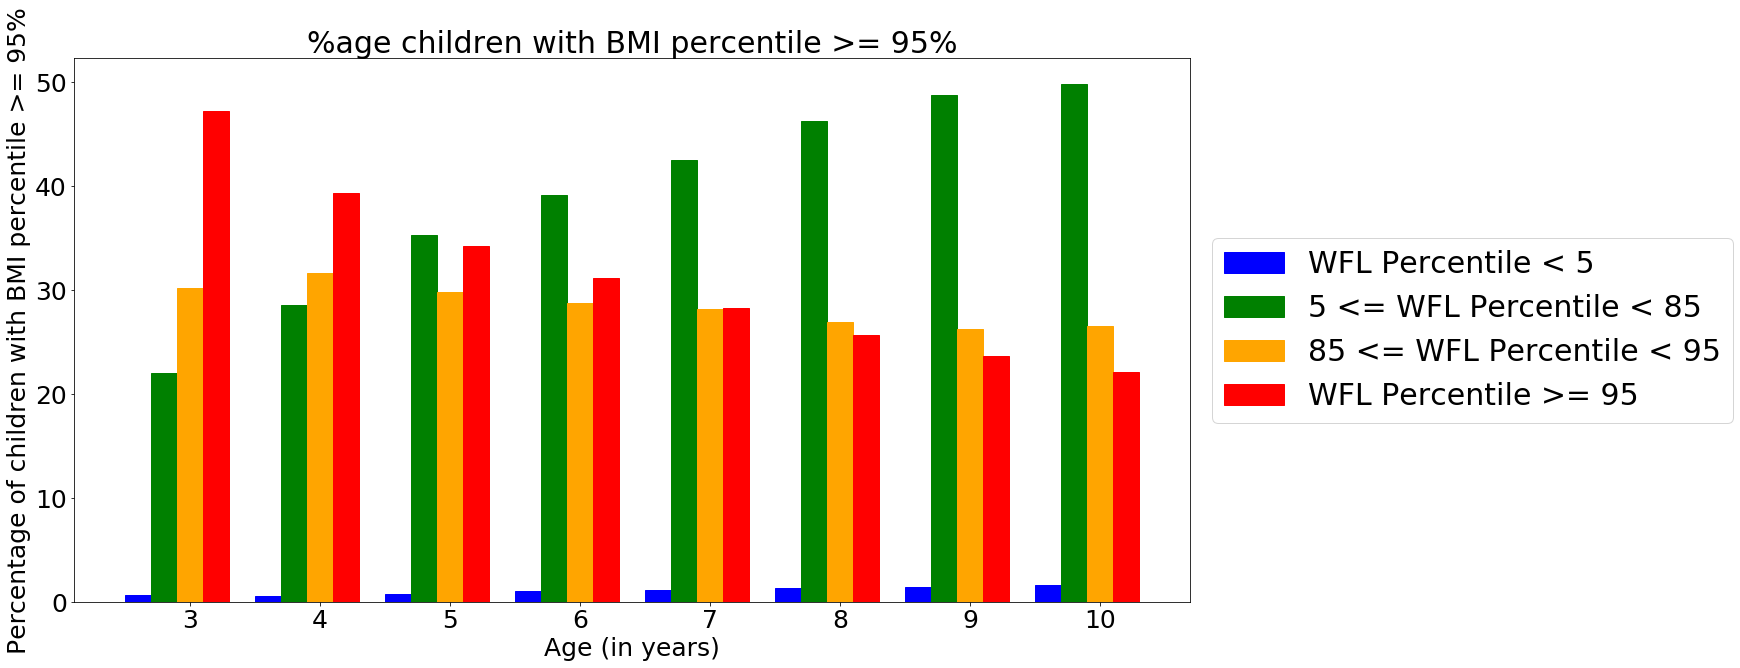

In [42]:
import matplotlib.patches as mpatches
plt.rcParams["figure.figsize"] = (20,10)
r1=0
for i in range(36,132,12): 
    sub=bmip[(bmip['Age_label']==i)].groupby('person_id').agg({'label':max})
    sub=sub.reset_index()
    sub=sub.drop_duplicates()
    sub=sub[sub['label']>95]
    
    last_2=bmip[(bmip['person_id'].isin(sub['person_id'].unique())) & (bmip['Age']<=24)].groupby(['person_id']).agg({'label':'last'}).reset_index()
    last_2_under=last_2[last_2['label']<=5]
    last_2_normal=last_2[(last_2['label']>5) & (last_2['label']<=85)]
    last_2_over=last_2[(last_2['label']>85) & (last_2['label']<=95)]
    last_2_obese=last_2[last_2['label']>95]
    
    under=(last_2_under['person_id'].nunique()/last_2['person_id'].nunique())*100
    normal=(last_2_normal['person_id'].nunique()/last_2['person_id'].nunique())*100
    over=(last_2_over['person_id'].nunique()/last_2['person_id'].nunique())*100
    obese=(last_2_obese['person_id'].nunique()/last_2['person_id'].nunique())*100
    
    print(under)
    print(normal)
    print(over)
    print(obese)
    print("==============================================")
    
    barlist=plt.bar([r1,r1+0.2,r1+(2*0.2),r1+(3*0.2)], [under,normal,over,obese], width=0.2)
    barlist[0].set_color('b')
    barlist[1].set_color('g')
    barlist[2].set_color('orange')
    barlist[3].set_color('r')
    r1+=1
plt.ylabel('Percentage of children with BMI percentile >= 95%', fontsize=25)
plt.xlabel('Age (in years)', fontsize=25)
plt.xticks([r + 0.4 for r in range(0,8)], ['3', '4', '5', '6', '7','8','9','10'], fontsize=25)
plt.yticks(fontsize=25)
under_patch = mpatches.Patch(color='b', label='WFL Percentile < 5')
n_patch = mpatches.Patch(color='g', label='5 <= WFL Percentile < 85')
over_patch = mpatches.Patch(color='orange', label='85 <= WFL Percentile < 95')
obese_patch = mpatches.Patch(color='r', label='WFL Percentile >= 95')
plt.legend(handles=[under_patch,n_patch,over_patch,obese_patch],fontsize=30,loc='center right' ,bbox_to_anchor=(1.5,0.5))
plt.title("%age children with BMI percentile >= 95%",fontsize=30)
plt.show()